<a href="https://colab.research.google.com/github/jassynavarro/CCDATSCL_EXAM_COM221/blob/main/CCDATSCL_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Exam

## Grading Rubric

Each question is worth 20 points. The answer to each question will be graded in terms of:


* Correct Analysis & Computation `(8 points)`
  - Correct use of pandas operations (groupby, aggregation, filtering).
  - Accurate statistics or summaries.

* Appropriate Use of Visuals / Tables — `(6 points)`
  - Visualization or table is relevant to the question.
  - Plot type is appropriate (bar, boxplot, line, etc.).
  - Labels and axes are clear.


* Interpretation and Reasoning — `(6 points)`
  - Conclusions are clearly stated.
  - Interpretations are supported by data.
  - Reasoning is logical and coherent.

## Variable Definitions

* **hotel**
  - H1 = Resort Hotel
  - H2 = City Hotel

* **is_canceled** - Value indicating if the booking was canceled.
  - (1) canceled
  - (0) not canceled

* **lead_time** - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* **arrival_date_year** - Year of arrival date

* **arrival_date_month** - Month of arrival date

* **arrival_date_week_number** - Week number of year for arrival date

* **arrival_date_day_of_month** - Day of arrival date

* **stays_in_weekend_nights** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

* **stays_in_week_nights** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

* **adults** - Number of adults

* **children** - Number of children

* **babies** - Number of babies

* **meal** - Type of meal booked. Categories are presented in standard hospitality meal packages:
  - Undefined/SC – no meal package.
  - BB – Bed & Breakfast.
  - HB – Half board (breakfast and one other meal – usually dinner).
  - FB – Full board (breakfast, lunch and dinner)

* **country** - Country of origin. Categories are represented in the ISO 3155–3:2013 format

* **market_segment** - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **distribution_channel** - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **is_repeated_guest** - Value indicating if the booking name was from a repeated guest.
  - 1 is a repeated guest.
  - 0 is not a repeated guest.

* **previous_cancellations** - Number of previous bookings that were cancelled by the customer prior to the current booking

* **previous_bookings_not_canceled** - Number of previous bookings not cancelled by the customer prior to the current booking

* **reserved_room_type** - Code of room type reserved. Code is presented instead of designation for anonymity reasons.

* **assigned_room_type** - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

* **booking_changes** - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

* **deposit_type** - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

  - No Deposit – no deposit was made.
  - Non Refund – a deposit was made in the value of the total stay cost.  
  - Refundable – a deposit was made with a value under the total cost of stay.

* **agent** - ID of the travel agency that made the booking

* **company** - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

* **days_in_waiting_list** - Number of days the booking was in the waiting list before it was confirmed to the customer

* **customer_type** - Type of booking, assuming one of four categories:   

  - Contract - when the booking has an allotment or other type of contract associated to it.
  - Group – when the booking is associated to a group.
  - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking.
  - Transient-party – when the booking is transient, but is associated to at least other transient booking

* **adr** - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

* **required_car_parking_spaces** - Number of car parking spaces required by the customer

* **total_of_special_requests** - Number of special requests made by the customer (e.g. twin bed or high floor)

* **reservation_status** - Reservation last status, assuming one of three categories:
  - Canceled – booking was canceled by the customer.
  - Check-Out – customer has checked in but already departed.
  - No-Show – customer did not check-in and did inform the hotel of the reason why

* **reservation_status_date** - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'hotel-booking-demand' dataset.
Path to dataset files: /kaggle/input/hotel-booking-demand


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


## 1. Dataset Overview & Core Distributions `(20 points)`

**Question:** What do the shapes and spread of the `lead_time` and `adr` distributions suggest about typical booking behavior and extreme cases in this dataset?

Perform an exploratory analysis of the distributional characteristics of key numerical variables in the hotel booking dataset.

You must:
- Analyze the distribution of lead_time and adr
- Use appropriate summary statistics and visualizations to support your analysis
- Identify any skewness and/or outliers in these variables

In [ ]:
# put your answer here
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
df[['lead_time', 'adr']].describe()

,lead_time,adr
count,119390.000000,119390.000000
mean,104.011416,101.831122
std,106.863097,50.535790
min,0.000000,-6.380000
25%,18.000000,69.290000
50%,69.000000,94.575000
75%,160.000000,126.000000
max,737.000000,5400.000000


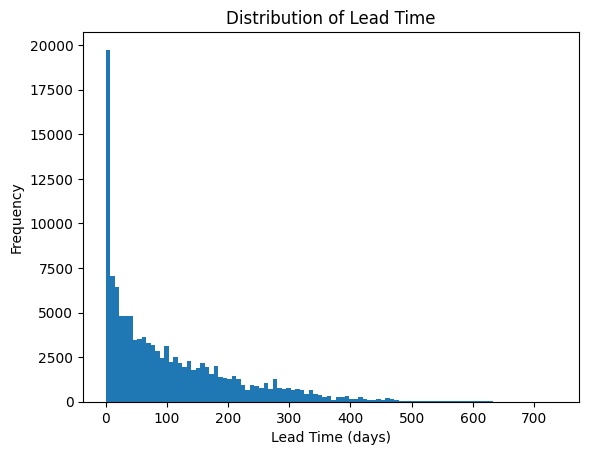

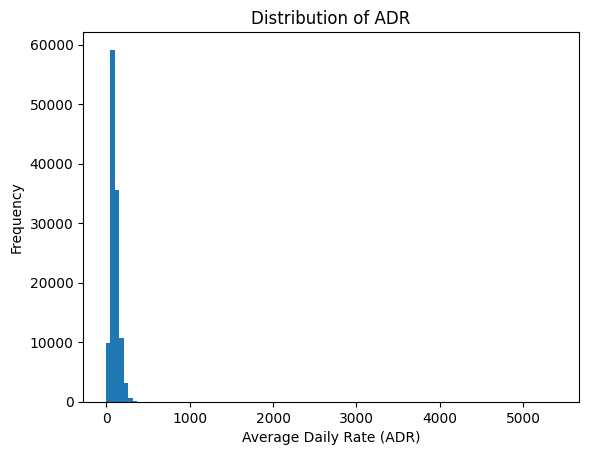

In [ ]:
# Lead Time Distribution
plt.figure()
plt.hist(df['lead_time'], bins=100)
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Lead Time')
plt.show()

# ADR Distribution
plt.figure()
plt.hist(df['adr'], bins=100)
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Frequency')
plt.title('Distribution of ADR')
plt.show()


**Distribution Analysis**

- The lead_time distribution is strongly right-skewed meaning mean is greater than the median, indicating that most guests book within short period before arrival. However, the presence of a long right tail suggests a small number of extreme cases where bookings are made several months in advance.

- The adr distribution is also right-skewed, showing that most bookings have relatively cheap to moderate daily rates, while a small number of bookings have exceptionally high adr values.

- Overall, the distributions of both lead_time and adr indicate typical booking behavior around shorter lead_time and cheap to moderate prices. The right-skewness and presence of outliers suggest that while most guests follow common booking patterns, there are extreme cases involving early bookings and high-value stays.


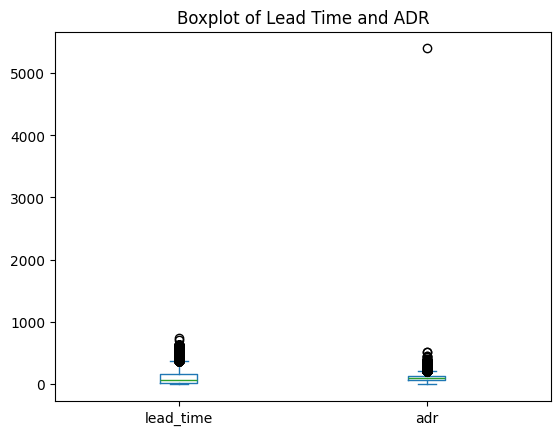

In [ ]:
df[['lead_time', 'adr']].plot(kind='box')
plt.title('Boxplot of Lead Time and ADR')
plt.show()

**Outliers Analysis**

- The lead_time boxplot shows a low median and a large number of high-end outliers, indicating a right-skewed distribution. Most bookings are made close to the arrival date, while a small number of bookings are made far in advance.

- The ADR boxplot indicates a right-skewed distribution with several extreme outliers, suggesting that while most bookings are moderately priced, a small number of stays have exceptionally high daily rates. Also, the max value of adr 5,400 is an outlier.

- The boxplots show that both lead_time and ADR are right-skewed with many high-value outliers. Most bookings are made with short lead times and moderate prices, while a small number of bookings involve early reservations and exceptionally high daily rates.

## 2. Booking Cancellations and Lead Time `(20 points)`

**Question**: Do bookings with longer lead times tend to cancel more often?

Analyze how `lead_time` differs between canceled and non-canceled bookings.

You must:
- Compute appropriate summary statistics
- Use at least one visualization
- Clearly describe the pattern you observe



In [ ]:
# put your answer here
df.groupby('is_canceled')['lead_time'].agg(['mean', 'median', 'count'])

,mean,median,count
is_canceled,,,
0,79.984687,45.0,75166
1,144.848815,113.0,44224


<Figure size 640x480 with 0 Axes>

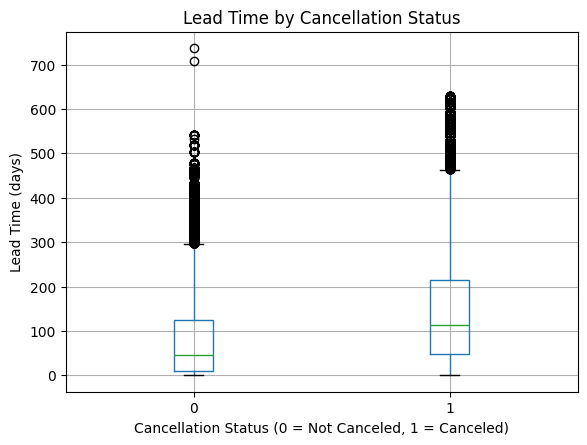

In [ ]:
plt.figure()
df.boxplot(column='lead_time', by='is_canceled')
plt.xlabel('Cancellation Status (0 = Not Canceled, 1 = Canceled)')
plt.ylabel('Lead Time (days)')
plt.title('Lead Time by Cancellation Status')
plt.suptitle('')
plt.show()

**Booking Cancellations and Lead Time Analysis**

Bookings that are canceled have a higher average lead time compared to bookings that are not canceled. Summary statistics show that canceled reservations are typically made further in advance, while non-canceled bookings tend to have shorter lead times.

The visualization comparing lead time distributions confirms this pattern: canceled bookings are more spread out and skewed toward higher lead time values.

This indicates a positive relationship between lead time and cancellation likelihood. The further in advance a booking is made, the greater the uncertainty in travel plans, increasing the chance of cancellation.

**Conclusion:** Yes, bookings with longer lead times tend to cancel more often.

## 3. Seasonality and Pricing `(20 points)`

**Question**: Do `Resort Hotels` and `City Hotels` exhibit different seasonal pricing behaviors throughout the year? If so, during which months are these differences most pronounced?

Analyze how Average Daily Rate (ADR) varies across arrival months, and compare this pattern between Resort Hotels and City Hotels.

You must:
- Aggregate ADR by month and hotel type
- Use a visualization to support your analysis
- Identify at least one seasonal pricing pattern

In [ ]:
# put your answer here
monthly_adr = df.groupby(['arrival_date_month', 'hotel'])['adr'].mean().reset_index()

In [ ]:
month_order = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

monthly_adr['arrival_date_month'] = pd.Categorical(
    monthly_adr['arrival_date_month'],
    categories=month_order,
    ordered=True
)

monthly_adr = monthly_adr.sort_values('arrival_date_month')

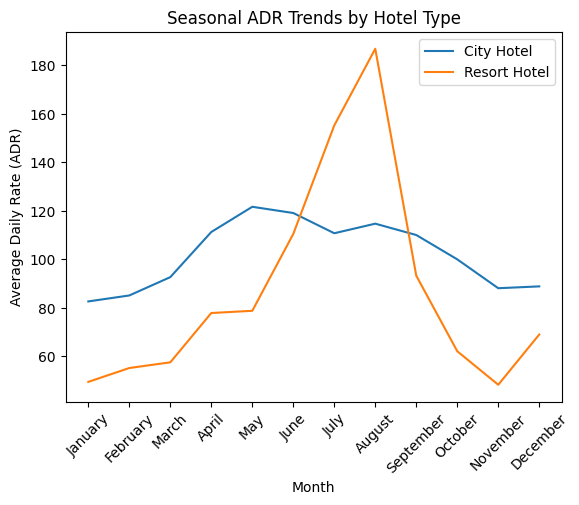

In [ ]:
for hotel_type in monthly_adr['hotel'].unique():
    subset = monthly_adr[monthly_adr['hotel'] == hotel_type]
    plt.plot(subset['arrival_date_month'], subset['adr'], label=hotel_type)

plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('Seasonal ADR Trends by Hotel Type')
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Seasonality and Pricing Analysis**

Average Daily Rate (ADR) varies by arrival month and differs between Resort Hotels and City Hotels, indicating seasonal pricing behavior.

Resort Hotels show strong seasonality, with ADR peaking during mid-year and summer months, which aligns with vacation travel patterns. City Hotels exhibit a more stable ADR throughout the year, with smaller fluctuations, likely driven by business travel demand.

The visualization shows that the largest differences between Resort and City Hotels occur during peak vacation months, when Resort Hotel ADR is significantly higher.

**Conclusion:** Yes, ADR varies seasonally, and this effect is more pronounced for Resort Hotels than City Hotels.

## 4. Customer Behavior `(20 points)`

**Question:** Do repeated guests behave differently from first-time guests?

Compare repeated guests and non-repeated guests in terms of:
- Cancellation rate
- Booking behavior (e.g., booking changes or lead time)
- Use summary statistics and/or visualizations to support your answer.


In [ ]:
# put your answer here
df.groupby('is_repeated_guest')['is_canceled'].mean()

,is_canceled
is_repeated_guest,
0,0.377851
1,0.144882


In [ ]:
df.groupby('is_repeated_guest')['lead_time'].mean()

,lead_time
is_repeated_guest,
0,106.425221
1,30.786352


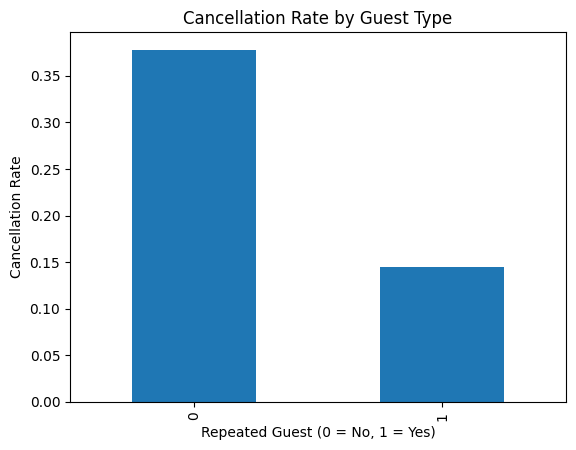

In [ ]:
# Cancellation Rate
df.groupby('is_repeated_guest')['is_canceled'].mean().plot(kind='bar')
plt.xlabel('Repeated Guest (0 = No, 1 = Yes)')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Guest Type')
plt.show()

**Customer Behavior Analysis**

Repeated guests behave differently from first-time guests in several important ways.

Repeated guests have a lower cancellation rate compared to non-repeated guests. They also tend to have shorter average lead times, indicating more confident and committed booking behavior.

Visualizations of cancellation rates support this finding, showing a clear gap between repeated and first-time guests. This suggests that repeated guests are more loyal and less uncertain in their travel plans.

**Conclusion:** Repeated guests are more reliable, less likely to cancel, and exhibit more consistent booking behavior than first-time guests.

## 5. Booking Cancellation Insights `(20 points)`

**Question:** Which combination of variables appears to have the strongest relationship with booking cancellations, and how do these variables interact to influence the likelihood of a cancellation?


Using at least three variables from the dataset, identify one strong pattern related to booking cancellations.

Your answer must:
- Clearly state the pattern
- Explain how the variables interact
- Support the conclusion with data


In [ ]:
# put your answer here
df['lead_time_group'] = pd.cut(
    df['lead_time'],
    bins=[-1, 30, 90, 365, 1000],
    labels=['Short', 'Medium', 'Long', 'Very Long']
)

cancel_pattern = df.groupby(
    ['lead_time_group', 'deposit_type', 'is_repeated_guest']
)['is_canceled'].mean().reset_index()

cancel_pattern.sort_values('is_canceled', ascending=False).head(10)

/tmp/ipython-input-1726769196.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_pattern = df.groupby(


,lead_time_group,deposit_type,is_repeated_guest,is_canceled
20,Very Long,Non Refund,0,1.000000
8,Medium,Non Refund,0,0.997922
14,Long,Non Refund,0,0.994537
2,Short,Non Refund,0,0.943739
3,Short,Non Refund,1,0.937500
13,Long,No Deposit,1,0.614583
10,Medium,Refundable,0,0.500000
12,Long,No Deposit,0,0.366798
22,Very Long,Refundable,0,0.333333
6,Medium,No Deposit,0,0.322708


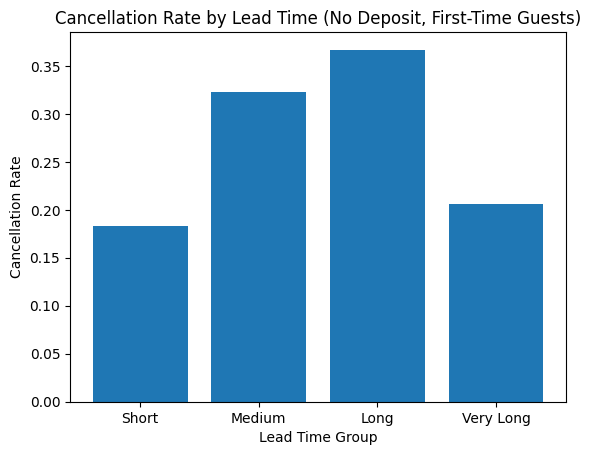

In [ ]:
filtered = cancel_pattern[
    (cancel_pattern['deposit_type'] == 'No Deposit') &
    (cancel_pattern['is_repeated_guest'] == 0)
]

plt.bar(filtered['lead_time_group'], filtered['is_canceled'])
plt.xlabel('Lead Time Group')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Lead Time (No Deposit, First-Time Guests)')
plt.show()

**Booking Cancellation Analysis**


The highest cancellation rates occur for bookings that combine long lead times, no deposit, and non-repeated guest status.

When these factors interact, cancellation risk increases significantly. Long lead times increase uncertainty, lack of a deposit removes financial commitment, and first-time guests are less loyal to the hotel.

The grouped analysis and visualization clearly show that this combination produces the highest cancellation probability.

**Conclusion:** Booking cancellations are best explained by the interaction of lead time, deposit type, and guest loyalty, with the highest risk occurring when all three risk factors are present.
